In [42]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# Loading the data-
data= pd.read_csv('/content/drive/MyDrive/mcdonalds.csv')

In [43]:
# Data Preprocessing-
# Converting "Yes"/"No" to binary (1/0)-
binary_cols = data.columns[:11]
data[binary_cols] = data[binary_cols].applymap(lambda x: 1 if x == "Yes" else 0)

<ipython-input-43-b24121332028>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[binary_cols] = data[binary_cols].applymap(lambda x: 1 if x == "Yes" else 0)


In [44]:
# Exploratory Data Analysis-
print("Dataset Overview:")
print(data.describe())
print("\nBinary Attribute Averages:")
print(data[binary_cols].mean())

Dataset Overview:
             yummy   convenient        spicy    fattening       greasy  \
count  1453.000000  1453.000000  1453.000000  1453.000000  1453.000000   
mean      0.552650     0.907777     0.093599     0.867171     0.526497   
std       0.497391     0.289440     0.291371     0.339506     0.499469   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000     0.000000     1.000000     0.000000   
50%       1.000000     1.000000     0.000000     1.000000     1.000000   
75%       1.000000     1.000000     0.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              fast        cheap        tasty    expensive      healthy  \
count  1453.000000  1453.000000  1453.000000  1453.000000  1453.000000   
mean      0.900206     0.598761     0.644184     0.357880     0.198899   
std       0.299828     0.490318     0.478925     0.479542     0.399309   
min       0.000000 

In [45]:
# Principal Component Analysis (PCA)-
pca = PCA()
pca_result = pca.fit_transform(data[binary_cols])
print("\nPCA Explained Variance Ratios:")
print(pca.explained_variance_ratio_)


PCA Explained Variance Ratios:
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]


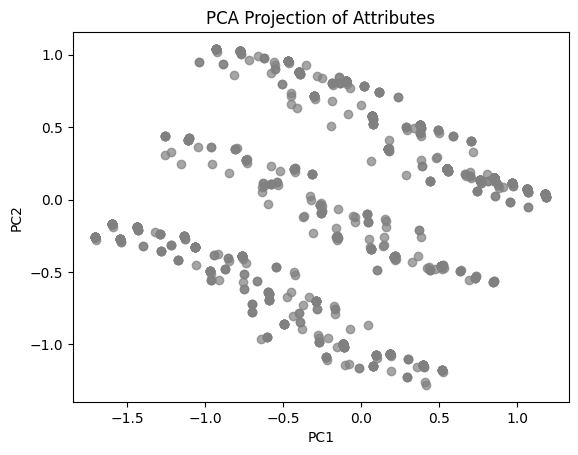

In [46]:
# Plotting PCA projection-
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7, c='grey')
plt.title("PCA Projection of Attributes")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [47]:
# K-Means Clustering-
k_values = range(2, 9)
inertia = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data[binary_cols])
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data[binary_cols], kmeans.labels_))

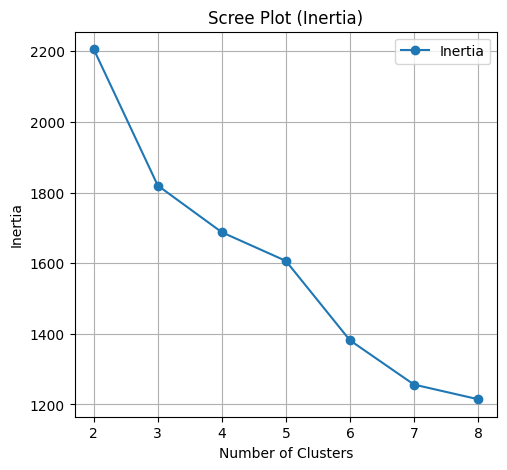

In [48]:
# Plotting Scree and Silhouette Scores-
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o', label='Inertia')
plt.title('Scree Plot (Inertia)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.legend()

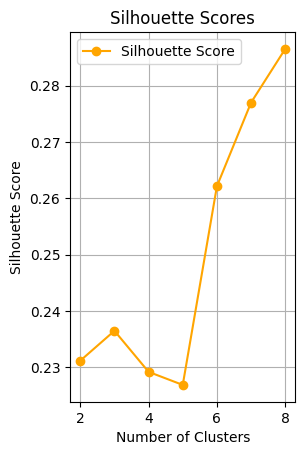

In [49]:
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange', label='Silhouette Score')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.legend()
plt.show()

In [50]:
# Selecting 4 clusters based on silhouette and scree plot-
kmeans = KMeans(n_clusters=4, random_state=42).fit(data[binary_cols])
data['Cluster'] = kmeans.labels_

In [51]:
# Profiling Segments-
profiles = data.groupby('Cluster')[binary_cols].mean()

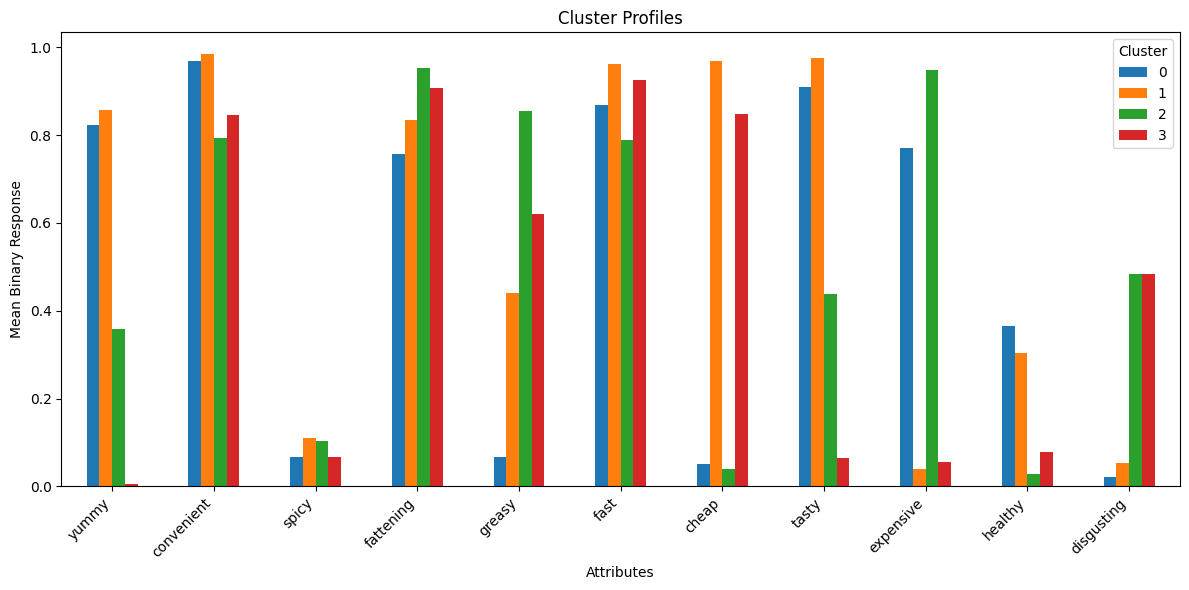

In [52]:
# Visualizing Cluster Profiles-
profiles.T.plot(kind='bar', figsize=(12, 6))
plt.title("Cluster Profiles")
plt.ylabel("Mean Binary Response")
plt.xlabel("Attributes")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

<ipython-input-53-3d0900704a46>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Cluster', y='Age', palette='viridis')


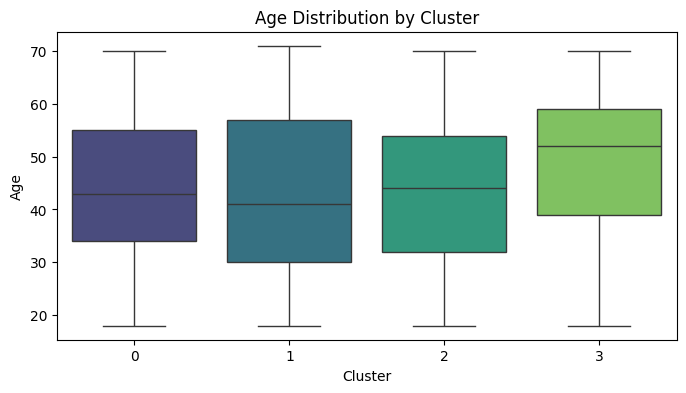

In [53]:
# Describing Segments-
# Gender and Age Analysis-
plt.figure(figsize=(8, 4))
sns.boxplot(data=data, x='Cluster', y='Age', palette='viridis')
plt.title("Age Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Age")
plt.show()

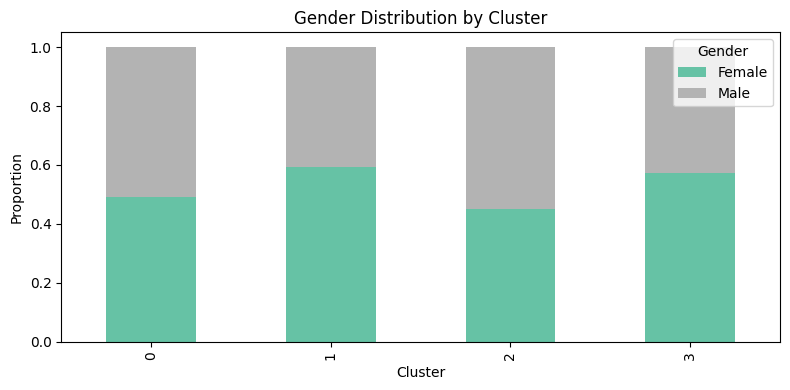

In [54]:
# Gender Distribution-
gender_dist = pd.crosstab(data['Cluster'], data['Gender'], normalize='index')
gender_dist.plot(kind='bar', stacked=True, figsize=(8, 4), colormap='Set2')
plt.title("Gender Distribution by Cluster")
plt.ylabel("Proportion")
plt.xlabel("Cluster")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()